In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["id", "Unnamed: 32"],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

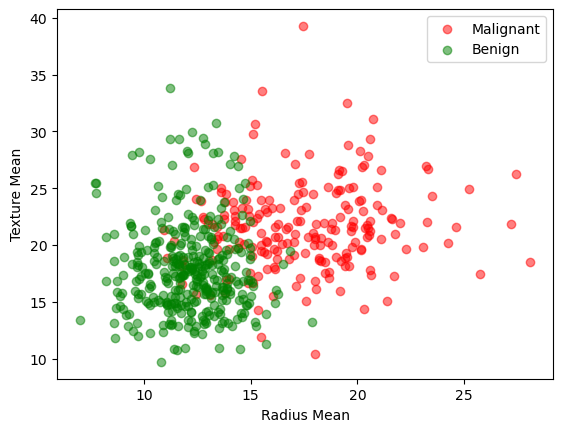

In [7]:
plt.scatter(M.radius_mean, M.texture_mean, color='red', label='Malignant', alpha=0.5)
plt.scatter(B.radius_mean, B.texture_mean, color='green', label='Benign', alpha=0.5)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()

In [8]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [9]:
X_data = data.drop(["diagnosis"],axis = 1)

In [10]:
y = data.diagnosis.values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size=0.3,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.fit_transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [15]:
y_hat = tree_clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_hat)
print(accuracy)

0.9181286549707602


Text(33.22222222222222, 0.5, 'y_true')

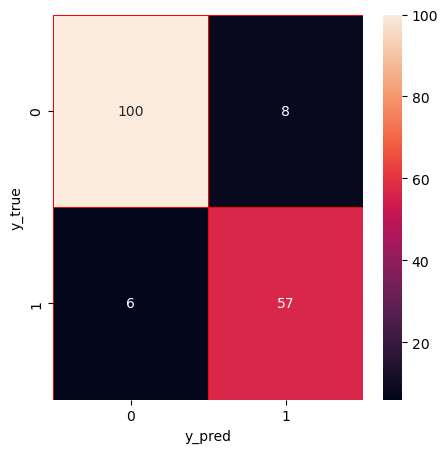

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_hat)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")